In [1]:
import pandas as pd

titanic_df = pd.read_csv("/Users/hj/Downloads/titanic/train.csv")

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_4077/817257290.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 가설 :
    1. 비상상황특성상 여성을 배려해서 많이 생존했을 것이다.
        - 1. pivot table을 만들어 확인
        - 2. 그래프로 확인

In [3]:
pd.pivot_table(titanic_df, index= 'Sex', columns= 'Survived', aggfunc='size')

# size() : 관측치 계수 다 세어줌

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex', ylabel='count'>

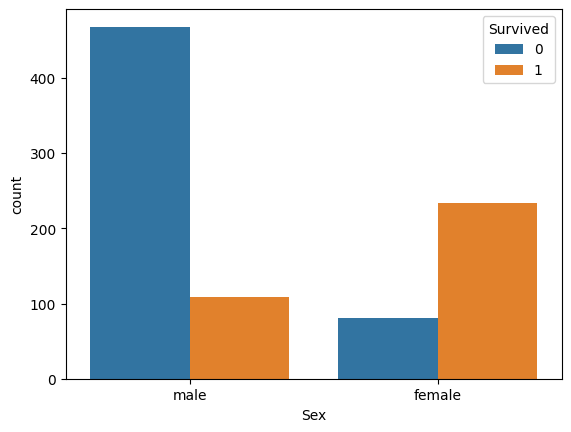

In [4]:
import seaborn as sns
# countplot : 데이터프레임에서 원하는 열의 각각의 고유한 값(value)의 개수를 세어 그래프에 표현해줌
sns.countplot(titanic_df, x='Sex', hue = 'Survived') #hue : 범례(색깔..?)

 - 정확도 (Accuracy) : 맞춘 개수 / 전체 데이터
 - 생존율 맞춤
    - 여성은 다 살아을 것이고, 남성은 모두 죽었을 것이다

In [5]:
(233+468)/891*100

# 78%

78.67564534231201

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 숫자
    - Age, SibSp, Parch, Fare, 
- 범주형
    - Pclass, Sec, Cabin, Embarked

- X 변수 1개, Y 변수(Survived)

In [7]:
# info() : 데이터에 대한 결측치, 데이터전체 개수  파악
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# x변수 : Fare, y변수 : Survived

X_1 = titanic_df[['Fare']]
y_true = titanic_df[['Survived']]

In [15]:
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='Fare', ylabel='Survived'>

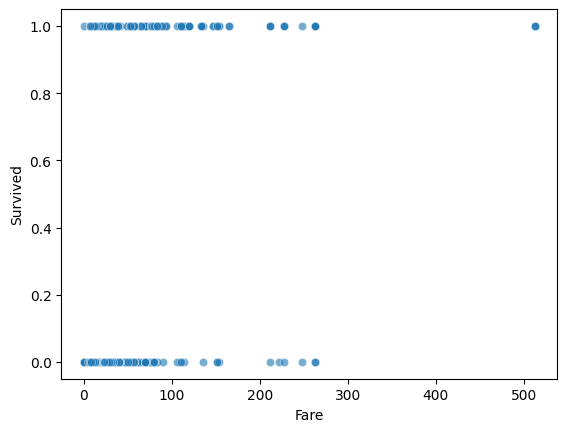

In [10]:
sns.scatterplot(titanic_df, x='Fare', y='Survived', alpha = 0.6)

<Axes: xlabel='Fare', ylabel='Count'>

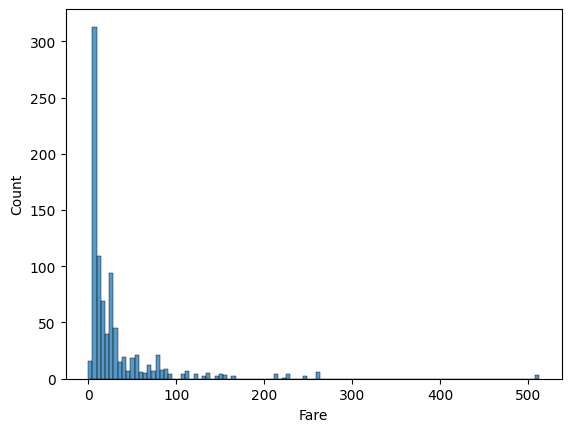

In [11]:
sns.histplot(titanic_df, x= 'Fare')  # y값 넣어줄 필요 없음

In [12]:
# 데이터 기술통계를 보는법(수치형) describe()

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
model_lor = LogisticRegression()
model_lor.fit(X_1, y_true)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
def get_att(x):
    #x모델을 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 개수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

In [18]:
get_att(model_lor)

클래스 종류 [0 1]
독립변수 개수 1
들어간 독립변수(x)의 이름 ['Fare']
가중치 [[0.01519617]]
바이어스 [-0.94129222]


In [20]:
# 평가 메소드
from sklearn.metrics import  accuracy_score, f1_score

def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1_score', f1_score(true, pred))

In [25]:
y_pred_1 = model_lor.predict(X_1)
y_pred_1[:10]
len(y_pred_1)
# 생존여부 array 형태로 반환

891

In [31]:
get_metrics(y_true, y_pred_1)

정확도 0.6655443322109988
f1_score 0.354978354978355


### 다중 로지스틱회귀

- 숫자
    - Age, SibSp, Parch, Fare, 
- 범주형
    - Pclass, Sec, Cabin, Embarked

- X 변수 1개, Y 변수(Survived)

In [32]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Y=Survived
# X(수치형): = Fare(요금)
# X(범주형): Pclass (좌석등급), Sex

In [34]:
def get_sex(x):
    if x == 'female':  # 대소문자 확인
        return 0
    else:
        return 1

titanic_df['Sex_en'] = titanic_df['Sex'].apply(get_sex)

In [35]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_en
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [36]:
X_2 = titanic_df[['Pclass', 'Sex_en', 'Fare']]
y_true = titanic_df[['Survived']]

model_lor_2 = LogisticRegression()
model_lor_2.fit(X_2, y_true)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
get_att(model_lor_2)

클래스 종류 [0 1]
독립변수 개수 3
들어간 독립변수(x)의 이름 ['Pclass' 'Sex_en' 'Fare']
가중치 [[-8.88331324e-01 -2.53993425e+00  1.64019087e-03]]
바이어스 [3.02004403]


In [39]:
# 예측치 만들기
y_pred_2 = model_lor_2.predict(X_2)
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [40]:
y_pred_1[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# x 변수가 Fare
get_metrics(y_true, y_pred_1)
# x 변수가 Fare, Pclass, Sex
get_metrics(y_true, y_pred_2)

정확도 0.6655443322109988
f1_score 0.354978354978355
정확도 0.7867564534231201
f1_score 0.7121212121212122


In [43]:
# 각 데이터별 Y=1인 확률 뽑아내기 (생존할 확률)

model_lor_2.predict_proba(X_2)

array([[0.8977979 , 0.1022021 ],
       [0.09546762, 0.90453238],
       [0.40901264, 0.59098736],
       ...,
       [0.40287202, 0.59712798],
       [0.58880217, 0.41119783],
       [0.89772263, 0.10227737]])

[0.8977979 , 0.1022021 ] 죽을 확률 90%, 살 확률 10%

In [44]:
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])